**MLP stands for "Multi-Layer Perceptron." It's a fundamental type of artificial neural network used in machine learning and deep learning for various tasks, including classification, regression, and pattern recognition.**

# Import Libraries

In [1]:
#Import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)

## Import data

In [3]:
# The dataset loading function from sklearn

from sklearn.datasets import fetch_california_housing

house_dataset = fetch_california_housing()
house_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
# Use Pandas to format data
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)
# extract target with their names into a pd.series
target = pd.Series(house_dataset.target, name='MEDV')
data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


## Training and test datsets

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state=42
)
#check the shape of whole dataset and the split training and test set
print("**Shape of the whole data**\n{}".format(data.shape))
print("\n**Shape of the target vector**\n {}".format(target.shape))
print("\n**Shape of the training data**\n {}".format(train_data.shape))
print("\n**Shape of the testing data**\n {}".format(test_data.shape))

**Shape of the whole data**
(20640, 8)

**Shape of the target vector**
 (20640,)

**Shape of the training data**
 (16512, 8)

**Shape of the testing data**
 (4128, 8)


In [9]:
train_data.shape, test_data.shape
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


## Data Preparation : normalization

In [10]:
def norm(x, mean, std):
  return(x - mean)/std

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

normed_train_data = norm(train_data, mean, std)
normed_test_data = norm(test_data, mean, std)

# Build up an MLP

In [19]:
from tensorflow.keras import layers, Sequential

model = Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=[8]),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)


In [20]:
# Now try out the model. Take a batch of 5 examples from the training data and call model.predict on it.
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 1s 646ms/step


array([[-0.13334146],
       [ 0.19044751],
       [ 0.19894266],
       [-0.06378566],
       [ 0.22420421]], dtype=float32)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Customize the optimizer configuration (learning rate here )

optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])

## Train and test the model

In [25]:
model.fit(normed_train_data, train_target, epochs=300, batch_size=1024, verbose=1)


Epoch 1/300
17/17 [==============================] - 2s 8ms/step - loss: 1.3040 - mae: 0.8188 - mse: 1.3040
Epoch 2/300
17/17 [==============================] - 0s 8ms/step - loss: 0.6367 - mae: 0.5799 - mse: 0.6367
Epoch 3/300
17/17 [==============================] - 0s 6ms/step - loss: 0.5769 - mae: 0.5541 - mse: 0.5769
Epoch 4/300
17/17 [==============================] - 0s 5ms/step - loss: 0.4979 - mae: 0.5108 - mse: 0.4979
Epoch 5/300
17/17 [==============================] - 0s 4ms/step - loss: 0.4919 - mae: 0.5067 - mse: 0.4919
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 0.4615 - mae: 0.4849 - mse: 0.4615
Epoch 7/300
17/17 [==============================] - 0s 4ms/step - loss: 0.4615 - mae: 0.4816 - mse: 0.4615
Epoch 8/300
17/17 [==============================] - 0s 4ms/step - loss: 0.4158 - mae: 0.4600 - mse: 0.4158
Epoch 9/300
17/17 [==============================] - 0s 4ms/step - loss: 0.4277 - mae: 0.4655 - mse: 0.4277
Epoch 10/300
17/17 [========

In [29]:
loss, mae, mse = model.evaluate(normed_test_data, test_target, verbose=0)
mse, loss, mae

(0.3105171322822571, 0.3105171322822571, 0.3640056252479553)

## Tunz the number of epochs

In [32]:
# Train the model (in silent mode, verbose=0)


def build_model():
    model = keras.Sequential(
        [
            layers.Dense(
                64, activation="relu", input_shape=[normed_train_data.shape[1]]
            ),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return model


model = build_model()

EPOCHS = 500
history = model.fit(
    normed_train_data,
    train_target,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=1024,
    verbose=1,
)


Epoch 1/500
13/13 [==============================] - 1s 32ms/step - loss: 1.4151 - mae: 0.8412 - mse: 1.4151 - val_loss: 0.7443 - val_mae: 0.6546 - val_mse: 0.7443
Epoch 2/500
13/13 [==============================] - 0s 10ms/step - loss: 0.6314 - mae: 0.5772 - mse: 0.6314 - val_loss: 0.6002 - val_mae: 0.5305 - val_mse: 0.6002
Epoch 3/500
13/13 [==============================] - 0s 12ms/step - loss: 0.5633 - mae: 0.5469 - mse: 0.5633 - val_loss: 0.5562 - val_mae: 0.5713 - val_mse: 0.5562
Epoch 4/500
13/13 [==============================] - 0s 11ms/step - loss: 0.4881 - mae: 0.5089 - mse: 0.4881 - val_loss: 0.6700 - val_mae: 0.5682 - val_mse: 0.6700
Epoch 5/500
13/13 [==============================] - 0s 11ms/step - loss: 0.5014 - mae: 0.5107 - mse: 0.5014 - val_loss: 0.6102 - val_mae: 0.5917 - val_mse: 0.6102
Epoch 6/500
13/13 [==============================] - 0s 11ms/step - loss: 0.4725 - mae: 0.4969 - mse: 0.4725 - val_loss: 0.5093 - val_mae: 0.4939 - val_mse: 0.5093
Epoch 7/500
13/1

In [33]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.154438,0.277869,0.154438,0.342021,0.376451,0.342021,495
496,0.159135,0.280144,0.159135,0.316499,0.368233,0.316499,496
497,0.160540,0.282197,0.160540,0.340938,0.395961,0.340938,497
498,0.161149,0.285011,0.161149,0.330484,0.374616,0.330484,498
499,0.155699,0.277801,0.155699,0.320654,0.383902,0.320654,499


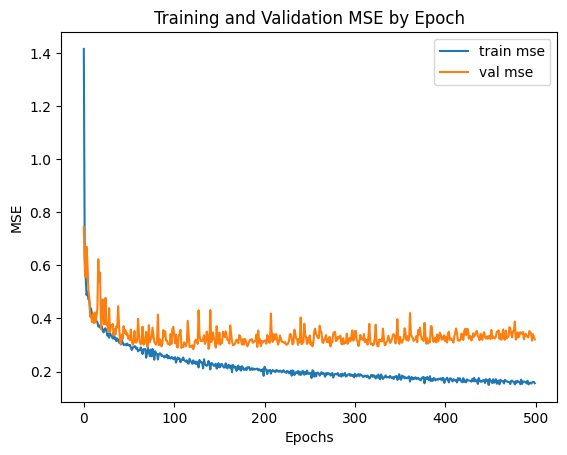

In [34]:
#VISUALIZES
plt.plot(hist["epoch"], hist["mse"], label="train mse")
plt.plot(hist["epoch"], hist["val_mse"], label="val mse")
plt.xlabel("Epochs")
plt.ylabel("MSE")
# Set a title of the current axes.
plt.title("Training and Validation MSE by Epoch")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
# You can try to type this code with numpy or Jax
# just iw ant to learn more about jax that's why i create this code from jax

In [35]:
import jax
import jax.numpy as jnp

def smooth_curve(values, std=5):
    # gaussian smoothing: Smooths a list of values by convolving with a gussian.
    width = std * 4
    x = jnp.linspace(-width, width, 2 * width + 1)
    kernel = jnp.exp(-((x / 5) ** 2))

    values = jnp.array(values)
    weights = jnp.ones_like(values)

    smoothed_values = jax.numpy.convolve(values, kernel, mode="same")
    smoothed_weights = jax.numpy.convolve(weights, kernel, mode="same")

    return smoothed_values / smoothed_weights


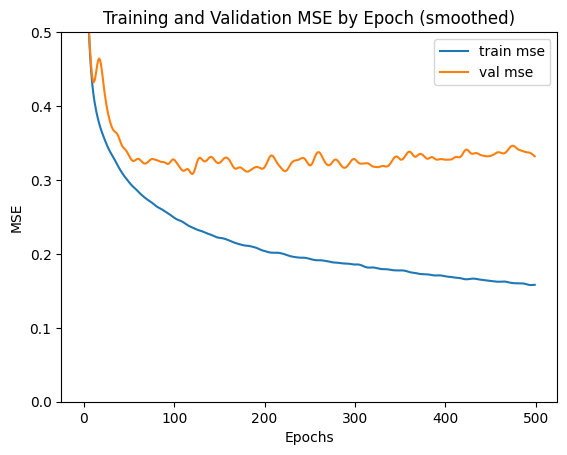

In [36]:
import matplotlib.pyplot as plt

plt.plot(hist["epoch"], smooth_curve(hist["mse"]), label="train mse")
plt.plot(hist["epoch"], smooth_curve(hist["val_mse"]), label="val mse")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim((0, 0.5))
# Set a title of the current axes.
plt.title("Training and Validation MSE by Epoch (smoothed)")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# Final fir model with full data and test model

In [38]:
model = build_model()
model.fit(normed_train_data, train_target, epochs=150, batch_size = 1024, verbose=1)

Epoch 1/150
17/17 [==============================] - 1s 6ms/step - loss: 1.2487 - mae: 0.7941 - mse: 1.2487
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6006 - mae: 0.5587 - mse: 0.6006
Epoch 3/150
17/17 [==============================] - 0s 10ms/step - loss: 0.5734 - mae: 0.5536 - mse: 0.5734
Epoch 4/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4886 - mae: 0.5056 - mse: 0.4886
Epoch 5/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4731 - mae: 0.4957 - mse: 0.4731
Epoch 6/150
17/17 [==============================] - 0s 6ms/step - loss: 0.4586 - mae: 0.4862 - mse: 0.4586
Epoch 7/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4517 - mae: 0.4826 - mse: 0.4517
Epoch 8/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4453 - mae: 0.4798 - mse: 0.4453
Epoch 9/150
17/17 [==============================] - 0s 9ms/step - loss: 0.4314 - mae: 0.4690 - mse: 0.4314
Epoch 10/150
17/17 [=======

In [40]:
loss, mae, mse = model.evaluate(normed_test_data, test_target, verbose=0)
mse

0.34967195987701416

129/129 [==============================] - 0s 1ms/step


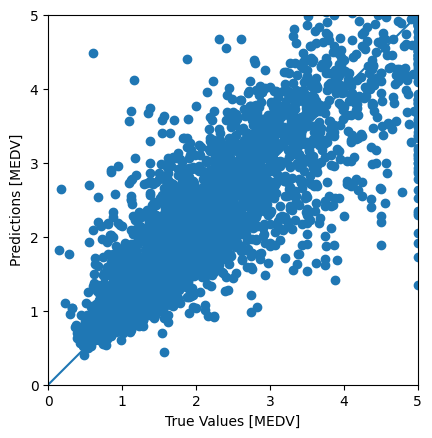

In [42]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect="equal")
plt.scatter(test_target, test_predictions)
plt.xlabel("True Values [MEDV]")
plt.ylabel("Predictions [MEDV]")
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)